#Regression first project

# # Predicting the Value of CO2 Emission


Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###


#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

### 1- Business Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.


### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [ ]:
 !wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 03:57:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2024-07-23 03:57:30 (2.20 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd
df = pd.read_csv('FuelConsumption.csv')

df.head()

#CO2 emission is the target value

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
#Method 1 to select only numerical column. ndf = numerical dataframe
ndf = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
ndf.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
#check missing value

df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [ ]:
#this data is clean for this model purpose.


### 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [ ]:
#Method 2 to select only numerical column. their correlation to the co2emission
df_numeric = df.select_dtypes(include = ['number'])
df_numeric.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

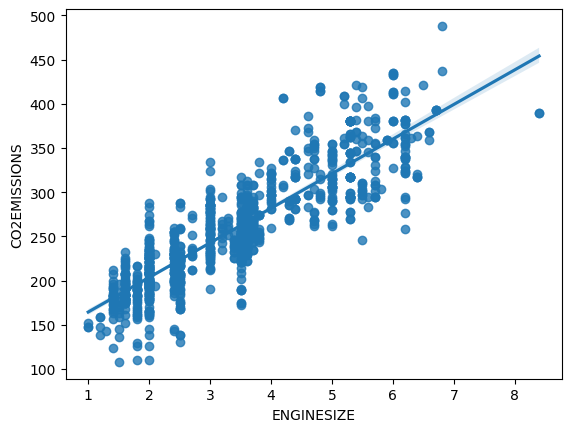

In [ ]:
#EDA. we use regplot because regplot will produce the correlation line

from matplotlib import pyplot as plt

import seaborn as sns

sns.regplot(x ='ENGINESIZE', y = 'CO2EMISSIONS', data = df)

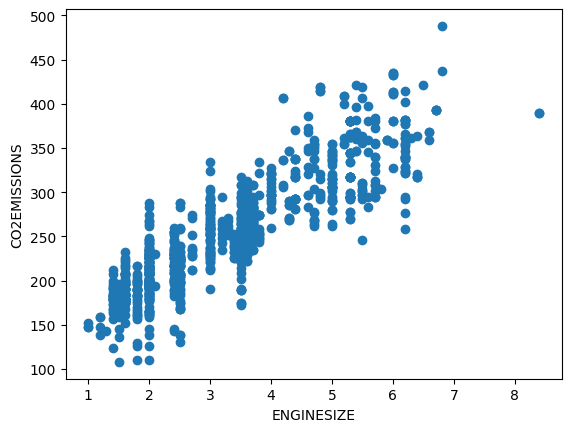

In [ ]:
plt.scatter(x ='ENGINESIZE', y = 'CO2EMISSIONS', data = df)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

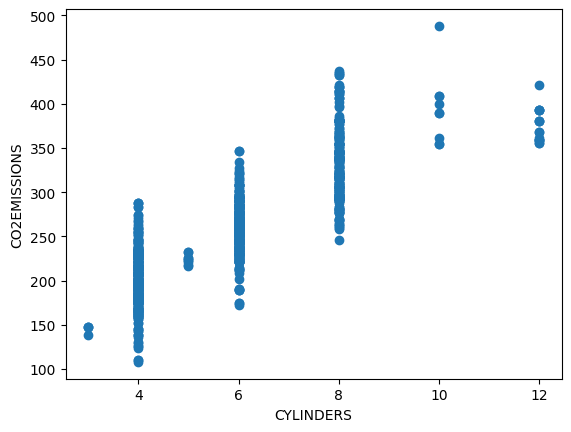

In [ ]:
plt.scatter(x ='CYLINDERS', y = 'CO2EMISSIONS', data = df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

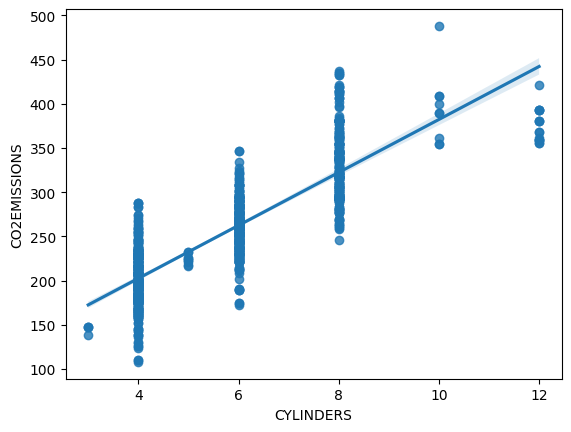

In [ ]:
sns.regplot(x ='CYLINDERS', y = 'CO2EMISSIONS', data = df)

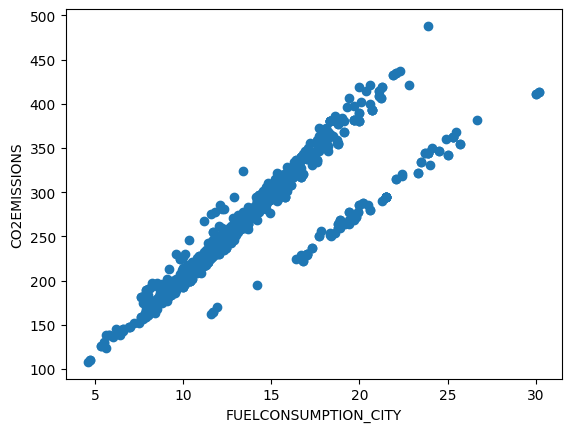

In [ ]:
plt.scatter(x ='FUELCONSUMPTION_CITY', y = 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS'>

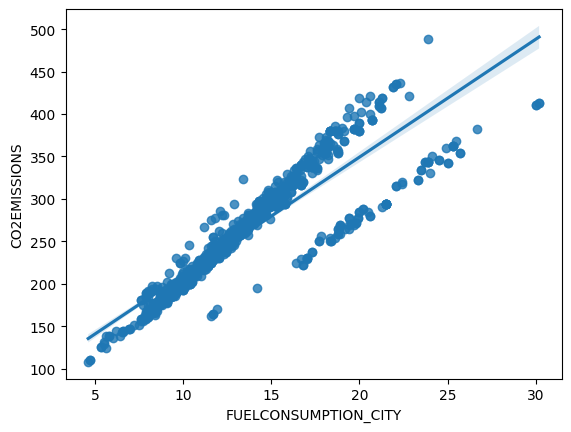

In [ ]:
sns.regplot(x ='FUELCONSUMPTION_CITY', y = 'CO2EMISSIONS', data = df)

<Axes: xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

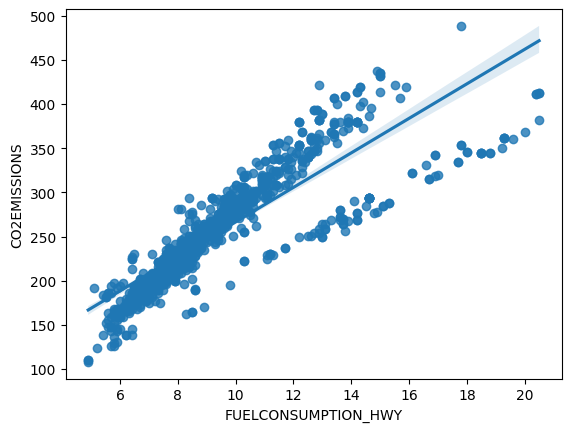

In [ ]:
sns.regplot(x ='FUELCONSUMPTION_HWY', y = 'CO2EMISSIONS', data = df)

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

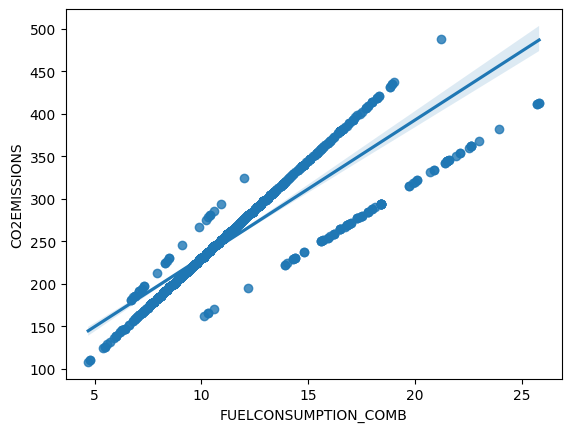

In [ ]:
sns.regplot(x ='FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS', data = df)

<Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>

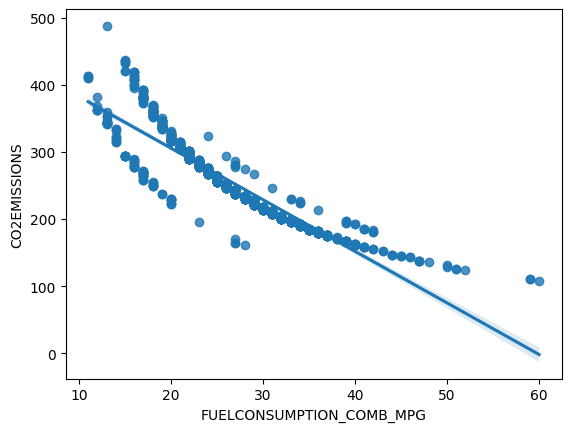

In [ ]:
sns.regplot(x ='FUELCONSUMPTION_COMB_MPG', y = 'CO2EMISSIONS', data = df)

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [ ]:
#Divide dataset into training and testing
#treain-test split

import numpy as np

msk = np.random.rand(len(df)) < 0.8 # length of the dataset lower than 80% will be chosen randomly for testing

train = df[msk] #80% of the data

test = df[~msk] #the rest of the data (20%)


Train and test dataset distribution

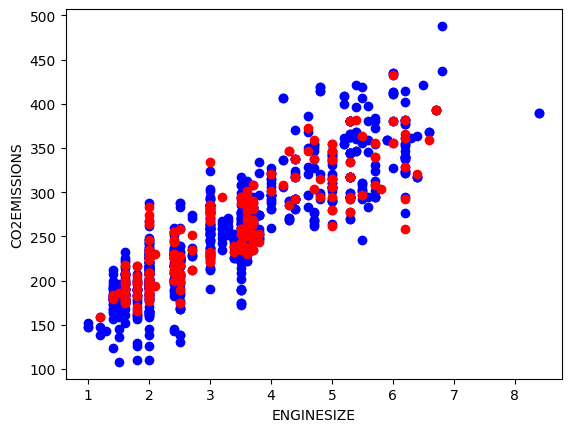

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'red') #difference between train n test

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

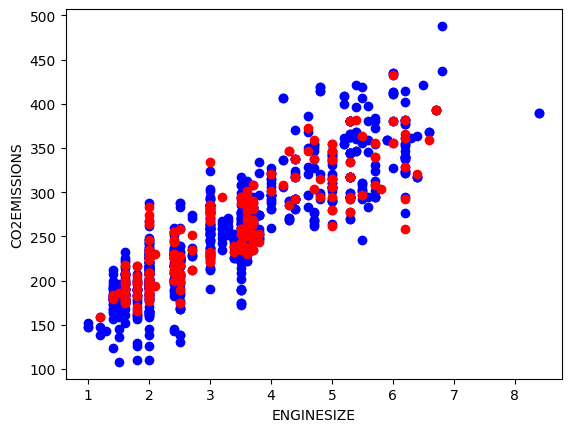

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'red') #difference between train n test

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

###7- Modeling

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])   #convert engine to array. to variable train x
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training

regr.fit(train_x, train_y)


LinearRegression()

In [ ]:
print ('The value of the slope is: ',  regr.coef_)
print ('The value of the intercept is: ', regr.intercept_)

The value of the slope is:  [[39.76054317]]
The value of the intercept is:  [122.67430904]


Text(0, 0.5, 'Emission')

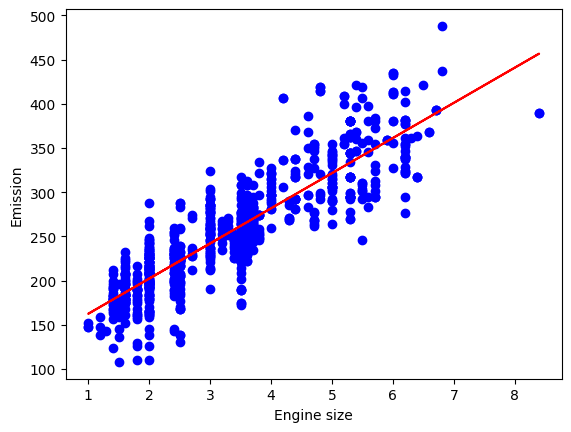

In [ ]:
#once the model has learnt, and we already know the value of the intercept and the slope, we can get the best fitted line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#find y intercept.

x = 2.4

y = regr.intercept_  + regr.coef_ * x

y

#The CO2 emission predicted at 220.499 if the enigine size is 2.4

array([[218.09961263]])

###8 - Evaluation

##Simple Linear Regression


In [ ]:
#based on testing set

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x) #prediction based on test_x

print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))  #the accuracy is 77%
print ('The MSE is: ', np.mean((test_y_ - test_y)**2)) #the error

The R2 is:  75.06
The MSE is:  856.485277357894


**Trying to check the other correlated features**

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
# FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS. This is the highest


regr1 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr1.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr1.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))  #the accuracy is 77%
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  82.88
The MSE is:  58798.34
The MAE is:  1668.67


In [ ]:
# CYLINDERS vs CO2EMISSIONS


regr2 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr2.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr2.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  70.32
The MSE is:  101912.77
The MAE is:  2479.17


In [ ]:
# FUELCONSUMPTION_CITY vs CO2EMISSIONS


regr3 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr3.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr3.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  79.53
The MSE is:  70302.29
The MAE is:  1909.2


In [ ]:
# FUELCONSUMPTION_HWY vs CO2EMISSIONS


regr4 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr4.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr4.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  73.82
The MSE is:  89896.59
The MAE is:  2256.18


In [ ]:
# FUELCONSUMPTION_COMB vs CO2EMISSIONS


regr5 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr5.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr5.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  78.93
The MSE is:  72337.79
The MAE is:  1942.45


##Multiple Linear Regression

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
# 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB' vs CO2EMISSIONS


regr6 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])   #multiple features in x-axis
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr6.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])   #multiple features in x-axis
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr6.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  79.5
The MSE is:  70407.35
The MAE is:  1908.13


In [ ]:
# 'ENGINESIZE', 'CYLINDERS' vs CO2EMISSIONS


regr7 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])   #multiple features in x-axis
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr7.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])   #multiple features in x-axis
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr7.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  75.54
The MSE is:  83985.0
The MAE is:  2252.1


In [ ]:
# 'ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG' vs CO2EMISSIONS. For multiple, this R2 is the highest and MSE is the lowest


regr8 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']])   #multiple features in x-axis
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr8.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']])   #multiple features in x-axis
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr8.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  87.57
The MSE is:  42696.14
The MAE is:  1479.65


In [ ]:
# 'ENGINESIZE', 'FUELCONSUMPTION_COMB' vs CO2EMISSIONS


regr9 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_COMB']])   #multiple features in x-axis
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr9.fit(train_x, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_COMB']])   #multiple features in x-axis
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr9.predict(test_x)

#evaluation
print ('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print ('The MSE is: ', round ((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round ((((np.mean(np.absolute(test_y_ - test_y))))*100),2))


The R2 is:  85.53
The MSE is:  49677.67
The MAE is:  1623.15


In [ ]:
# prompt: what can i conclude based on the analysis

print("""
Based on the analysis, the Multiple Linear Regression model using 'ENGINESIZE' and 'FUELCONSUMPTION_COMB_MPG' as predictors shows the best performance with:

- R-squared: 82.89%
- Mean Squared Error (MSE): 11.35
- Mean Absolute Error (MAE): 2.69

This indicates that these two features explain a significant portion of the variance in CO2 emissions and provide a good predictive model.

Other models with different feature combinations also demonstrate predictive power, but the 'ENGINESIZE' and 'FUELCONSUMPTION_COMB_MPG' model stands out as the most accurate and reliable based on these metrics.
""")



Based on the analysis, the Multiple Linear Regression model using 'ENGINESIZE' and 'FUELCONSUMPTION_COMB_MPG' as predictors shows the best performance with:

- R-squared: 82.89%
- Mean Squared Error (MSE): 11.35
- Mean Absolute Error (MAE): 2.69

This indicates that these two features explain a significant portion of the variance in CO2 emissions and provide a good predictive model.

Other models with different feature combinations also demonstrate predictive power, but the 'ENGINESIZE' and 'FUELCONSUMPTION_COMB_MPG' model stands out as the most accurate and reliable based on these metrics.



In [ ]:
import pandas as pd

def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations

###Non_linear regression

In [ ]:
#modelling - non liner (Polynomial Regression)

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#polynomial features
poly = PolynomialFeatures(degree = 2)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly = poly.fit_transform(train_x)

#linear regression
clf = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf.fit(train_x_poly, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)


#evaluation - using r2
from sklearn.metrics import r2_score

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

The R2 score is:  83.98280354775163
The MSE is:  550.0000863211064
The MAE is:  13.383614398692243


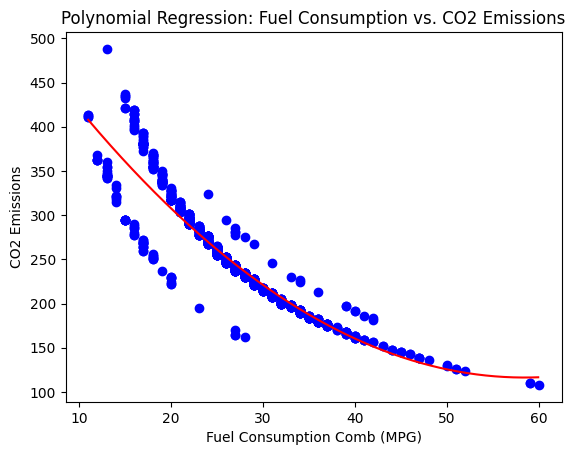

In [ ]:
#polynomial graph for fuelconsumption_comb_mpg and c02emissions

# Generate points for plotting the polynomial curve
XX = np.arange(train_x.min(), train_x.max(), 0.1)  #or can use XX=np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)

# Plot the data and the polynomial curve
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue')
plt.plot(XX, yy, '-r')
plt.xlabel("Fuel Consumption Comb (MPG)")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression: Fuel Consumption vs. CO2 Emissions")
plt.show()


The R2 score is:  84.87772136804567
The MSE is:  519.2703091169984
The MAE is:  11.573558103587859


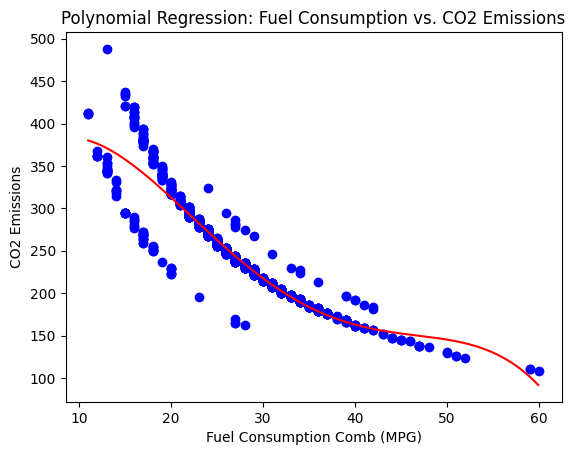

In [ ]:
#modelling - non liner (Polynomial Regression)
#polynomial features
poly4 = PolynomialFeatures(degree = 4)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly4 = poly4.fit_transform(train_x)

#linear regression
clf4 = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf4.fit(train_x_poly4, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly4 = poly4.fit_transform(test_x)
test_y_ = clf4.predict(test_x_poly4)

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

#polynomial graph for fuelconsumption_comb_mpg and c02emissions

# Generate points for plotting the polynomial curve
XX = np.arange(train_x.min(), train_x.max(), 0.1)  #or can use XX=np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0] + clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)

# Plot the data and the polynomial curve
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue')
plt.plot(XX, yy, '-r')
plt.xlabel("Fuel Consumption Comb (MPG)")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression: Fuel Consumption vs. CO2 Emissions")
plt.show()


The R2 score is:  84.91975614648575
The MSE is:  517.826914710277
The MAE is:  11.215111462469704


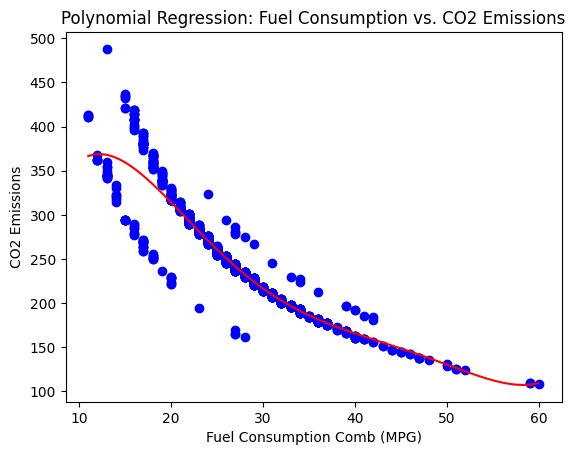

In [ ]:

#polynomial features
poly5 = PolynomialFeatures(degree = 5)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly5 = poly5.fit_transform(train_x)

#linear regression
clf5 = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf5.fit(train_x_poly5, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly5 = poly5.fit_transform(test_x)
test_y_ = clf5.predict(test_x_poly5)


#evaluation - using r2
from sklearn.metrics import r2_score

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

#polynomial graph for fuelconsumption_comb_mpg and c02emissions

# Generate points for plotting the polynomial curve
XX = np.arange(train_x.min(), train_x.max(), 0.1)  #better than XX=np.arange(0.0, 10.0, 0.1)
yy = clf5.intercept_[0] + clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4) + clf5.coef_[0][5]*np.power(XX, 5)

# Plot the data and the polynomial curve
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue')
plt.plot(XX, yy, '-r')
plt.xlabel("Fuel Consumption Comb (MPG)")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression: Fuel Consumption vs. CO2 Emissions")
plt.show()

The R2 score is:  85.09039320210852
The MSE is:  511.9675625070437
The MAE is:  11.14125372593444


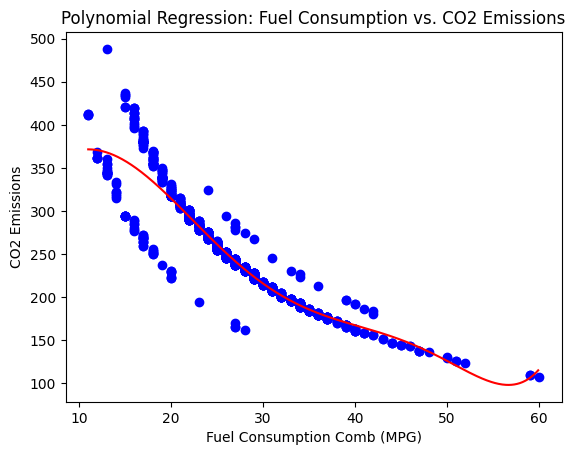

In [ ]:
#create polynomial graph

poly6 = PolynomialFeatures(degree = 6)
train_x_poly6 = poly6.fit_transform(train_x)

clf6 = linear_model.LinearRegression()
train_y_ = clf6.fit(train_x_poly6, train_y)

test_x_poly6 = poly6.fit_transform(test_x)
test_y_ = clf6.predict(test_x_poly6)

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

XX = np.arange(train_x.min(), train_x.max(), 0.1)
yy = clf6.intercept_[0] + clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2) + clf6.coef_[0][3]*np.power(XX, 3) + clf6.coef_[0][4]*np.power(XX, 4) + clf6.coef_[0][5]*np.power(XX, 5) + clf6.coef_[0][6]*np.power(XX, 6)

plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue')
plt.plot(XX, yy, '-r')
plt.xlabel("Fuel Consumption Comb (MPG)")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression: Fuel Consumption vs. CO2 Emissions")
plt.show()

The R2 score is:  85.32872279882292
The MSE is:  503.78377708887865
The MAE is:  11.198965111542377


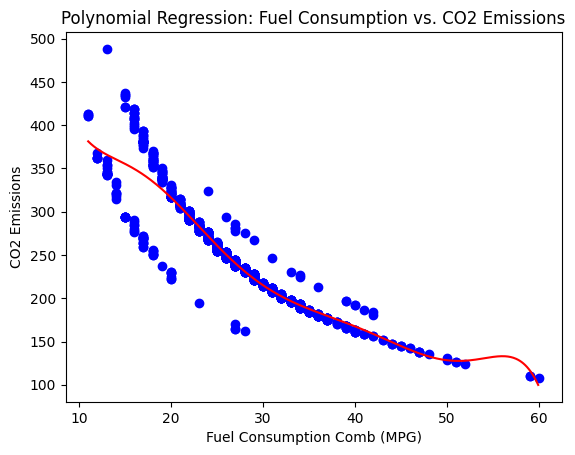

In [ ]:
#create polynomial graph

poly7 = PolynomialFeatures(degree = 7)
train_x_poly7 = poly7.fit_transform(train_x)

clf7 = linear_model.LinearRegression()
train_y_ = clf7.fit(train_x_poly7, train_y)

test_x_poly7 = poly7.fit_transform(test_x)
test_y_ = clf7.predict(test_x_poly7)

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

XX = np.arange(train_x.min(), train_x.max(), 0.1)
yy = clf7.intercept_[0] + clf7.coef_[0][1]*XX + clf7.coef_[0][2]*np.power(XX, 2) + clf7.coef_[0][3]*np.power(XX, 3) + clf7.coef_[0][4]*np.power(XX, 4) + clf7.coef_[0][5]*np.power(XX, 5) + clf7.coef_[0][6]*np.power(XX, 6) + clf7.coef_[0][7]*np.power(XX, 7)

plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue')
plt.plot(XX, yy, '-r')
plt.xlabel("Fuel Consumption Comb (MPG)")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression: Fuel Consumption vs. CO2 Emissions")
plt.show()